
### FLIGHT-FARE PREDICTION

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [69]:
train = pd.read_excel('../input/flight-fare-prediction-mh/Data_Train.xlsx')

In [70]:
train.shape

(10683, 11)

In [71]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [72]:
print(train.isnull().sum()) #checking for null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [73]:
train=train.dropna()

### Extracting day,month,year,weekday from Date of Journey

In [74]:
train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
train['weekday']= pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.weekday



In [75]:
train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)


In [76]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

### Converting duration into minutes

In [77]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
train['Duration']=train['Duration'].apply(duration)


In [78]:
train['Duration'].nunique()

367

### Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [79]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train['Dep_Time']=train['Dep_Time'].apply(deparrtime)
train['Arrival_Time']=train['Arrival_Time'].apply(deparrtime)


### Converting total_stops to 0,1,2,3 and so on..

In [80]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
train['Total_Stops']=train['Total_Stops'].apply(stops)

In [81]:
pd.options.mode.chained_assignment = None 
for i in range(train.shape[0]):
    if(train.iloc[i]['Additional_Info']=='No info'):
        train.iloc[i]['Additional_Info']='No Info' 

In [82]:
train=train.drop(['Route'], axis=1) #we don't need it as we already have total_stops

In [83]:
train.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  weekday          10682 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


In [85]:
train["Duration"] = train["Duration"].astype(int)
train["Journey_Day"] = train["Journey_Day"].astype(object)
train["Journey_Month"] = train["Journey_Month"].astype(object)
train["weekday"] = train["weekday"].astype(object)

In [86]:
df1 =train.copy() 

In [87]:
df1["Journey_Month"]=df1["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) #assigning month names

In [88]:
df1["Journey_Month"]=df1["Journey_Month"].astype(object)

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  int64 
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  object
 10  Journey_Month    10682 non-null  object
 11  weekday          10682 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


# EDA

[Text(0, 0, 'March'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'April')]

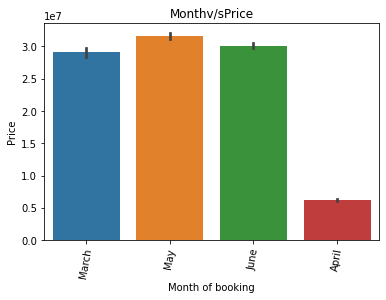

In [24]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_Month', y='Price', data=df1,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

In [26]:
#count of flights per month
top_month=df1.Journey_Month.value_counts().head(10)
top_month

May      3465
June     3414
March    2724
April    1079
Name: Journey_Month, dtype: int64

### Analysis :

######  We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May.
###### This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time.
###### The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1.

In [27]:
monthly_avg=df1.groupby(['Journey_Month']).agg({'Price':np.mean}).reset_index()

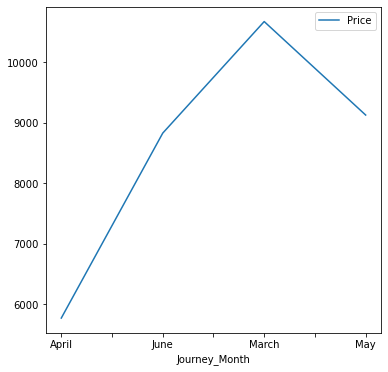

In [28]:
#Journey month v/s Averagefare
monthly_avg.plot(x='Journey_Month',y='Price',figsize=(6,6))

### Analysis :

###### We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand  and hence higher fare prices.(since the count of tickets booked  for travelling in May is the most, prior bookings  are done in March)

<function matplotlib.pyplot.show(*args, **kw)>

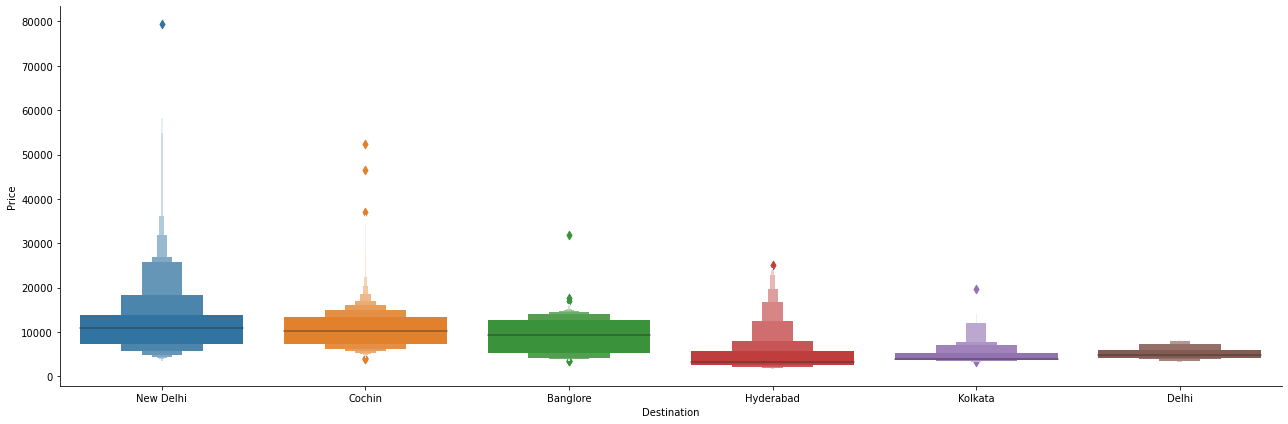

In [29]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df1.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### Analysis :

###### The airfare price range in Delhi & New Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)
###### The same reasoning can be given for higher price range in delhi as the source of the flight.

<function matplotlib.pyplot.show(*args, **kw)>

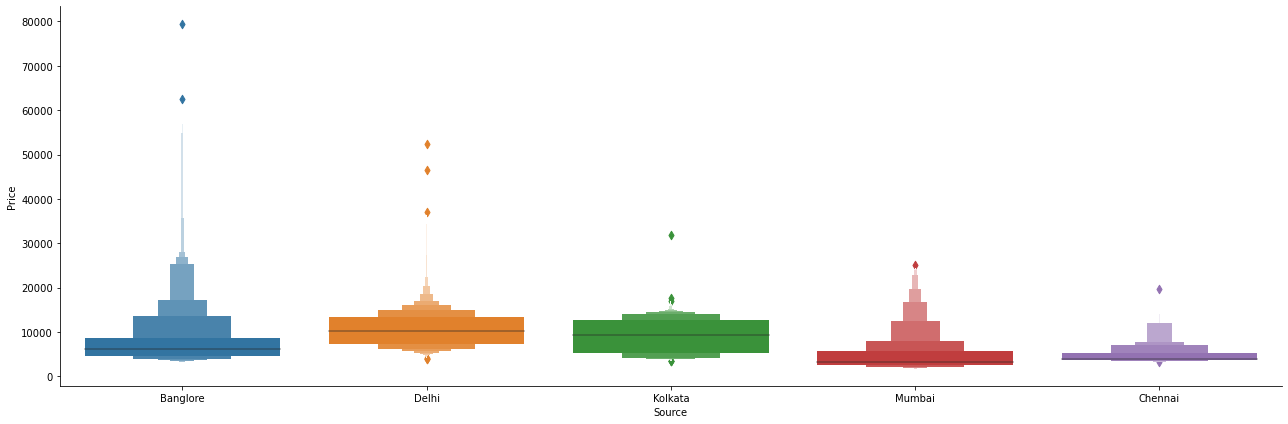

In [30]:
# Source vs AveragePrice
sns.catplot(y='Price',x='Source',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

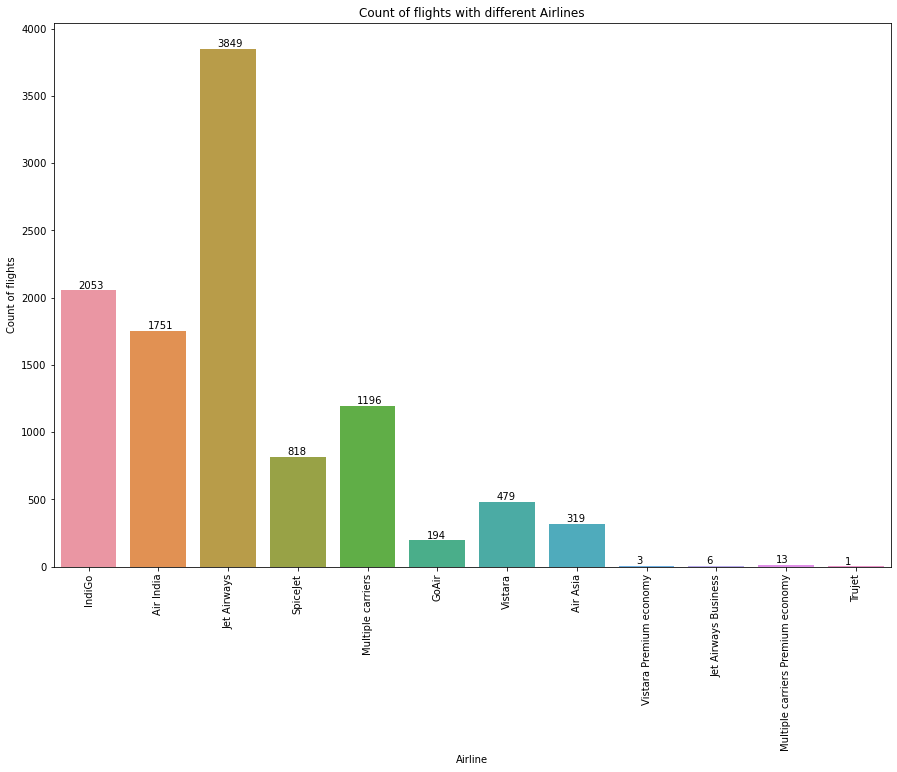

In [31]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

### Analysis :

###### from the diagram below we can see that jet airways Business have the highest price
###### apart from the first airline almost all are having similar median


<function matplotlib.pyplot.show(*args, **kw)>

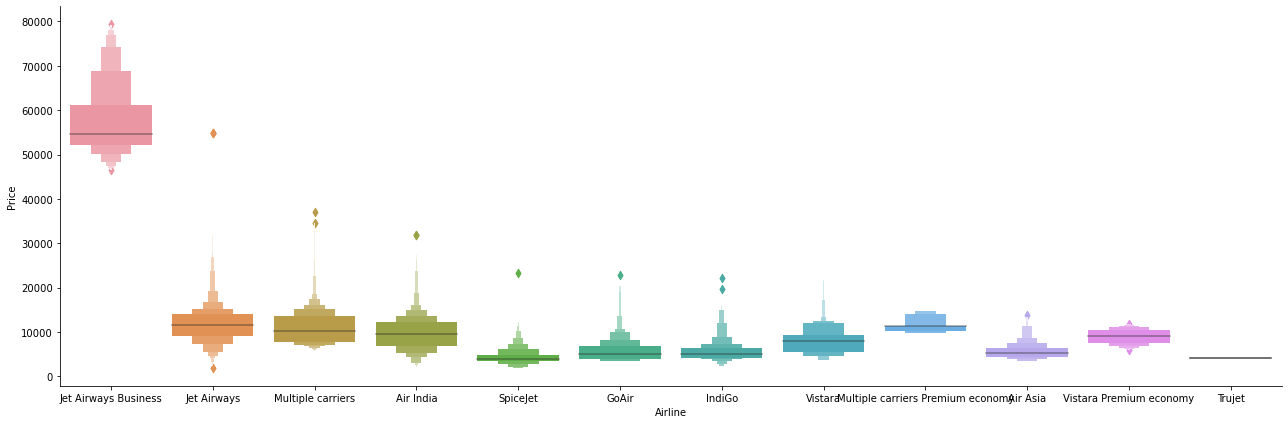

In [32]:
# Airline vs AveragePrice
sns.catplot(y='Price',x='Airline',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### Analysis :

###### Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range .

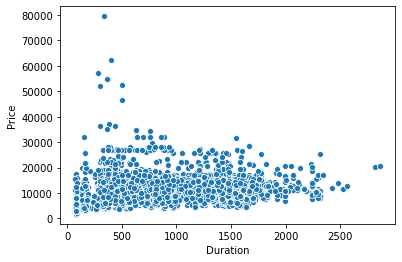

In [33]:
#duration v/s AveragePrice
sns.scatterplot(data=train, x='Duration', y='Price')

### Analysis :

###### We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)

[Text(0, 0, 'Night'),
 Text(0, 0, 'Morning'),
 Text(0, 0, 'Evening'),
 Text(0, 0, 'Afternoon')]

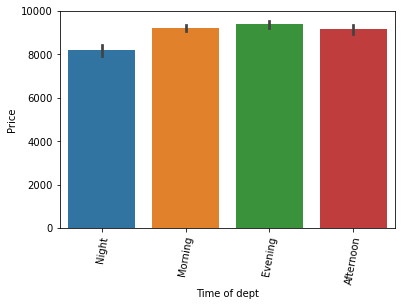

In [34]:
#Deptarure time v/s AveragePrice
v2=sns.barplot(x='Dep_Time', y='Price', data=train)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)

In [35]:
# time of departure v/s count of flights
top_time=train.Dep_Time.value_counts().head(10)
top_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

### Analysis:

###### Early Morning flights are always cheaper and so are midnight flight prices.
###### Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.


[Text(0, 0, 'Night'),
 Text(0, 0, 'Afternoon'),
 Text(0, 0, 'Morning'),
 Text(0, 0, 'Evening')]

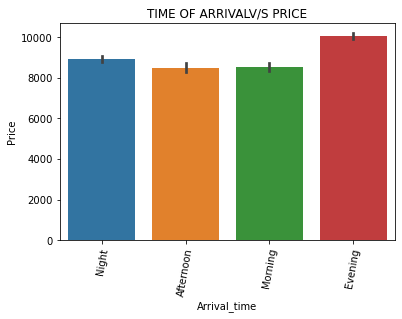

In [37]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=train)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4')]

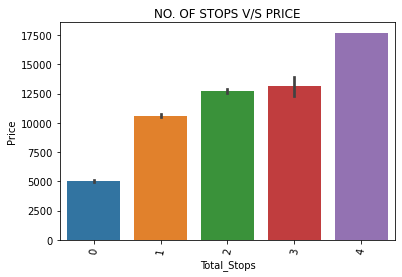

In [38]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=train)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

### Analysis :

###### As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6')]

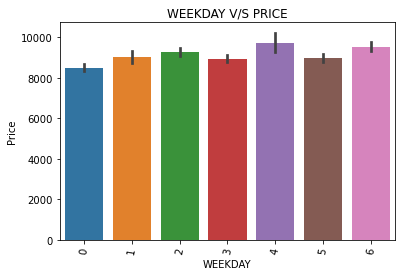

In [40]:
#WEEKDAY V/S average price
v4=sns.barplot(x='weekday', y='Price', data=train)
v4.set_title('WEEKDAY V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('WEEKDAY')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

### Analysis :
###### We see that prices are highest on a friday, that may be because this is when airlines start raising prices to make up for the lower prices before and also because weekdays are off for most people so they are mostly travelling to or travelling back.

In [41]:
train["Journey_Day"].unique()

array([24, 1, 9, 12, 27, 18, 3, 15, 6, 21], dtype=object)

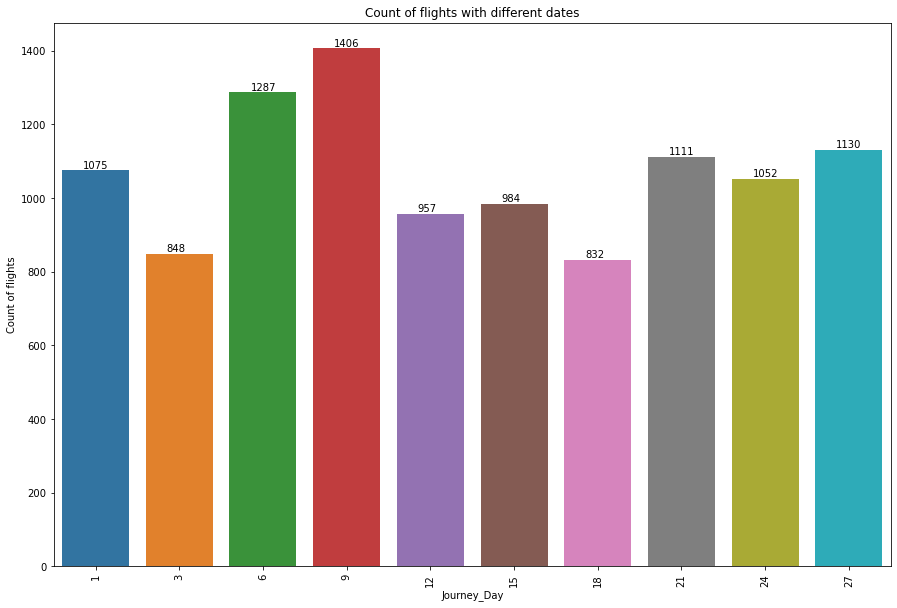

In [42]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'Journey_Day', data =train)
plt.xlabel('Journey_Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '24'),
 Text(0, 0, '27')]

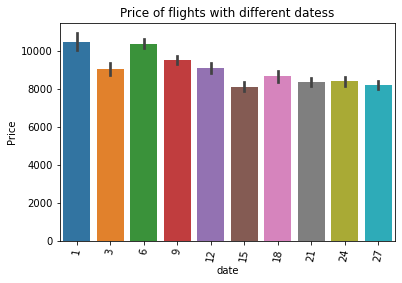

In [43]:
#Journey_Day v/s Average price
v5=sns.barplot(x='Journey_Day', y='Price', data=train)
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('date')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)

### Analysis :

###### It looks like that there's a trend in the air fare when compared to the day of respective months, prices are higher in the start of month but this is not a trend if you see from the broader perspective as this might be due to various reasons. For eg.  the date of Journey is 10th March and people are booking towards 5th March or so, this will lead to higher flight prices.(Prices increase as near you date of booking is to the date of journey). So flight prices don't follow any particular pattern towards any time of the month.

In [90]:
print(train.dtypes)

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration            int64
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day        object
Journey_Month      object
weekday            object
dtype: object


### Outlier Detection 

In [92]:
ncol=["Duration"]          
for i in ncol:
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    train = train.drop(train[train.loc[:,i] <= min].index)
    train = train.drop(train[train.loc[:,i] >= max].index)

In [93]:
train.shape

(10605, 12)

## Correlation tests
 Pearson correlation coefficient : To check the linear association between the target variable and independent continuous variable.(this condition needs to be met)
 
 H0: Two variables are not correlated 
 
 H1: Two variables are correlated
 
if p-value < 0.05, then we reject the null hypothesis and accept the H1, saying they are correlated.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


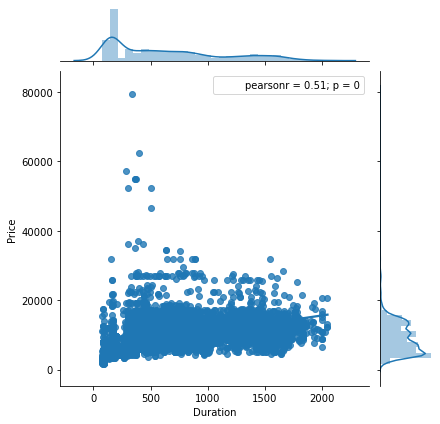

In [94]:
import scipy.stats as stats
_ = sns.jointplot(x='Duration',y='Price',data=train,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

We get p-value < 0.05, hence we accept H1 and say the target variable and continuous independent variable are correlated. r = 0.51 says they are moderately related.

In [95]:
# Import label encoder 
colnames = list(train.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if train[col].dtype==object:
        train[col]= label_encoder.fit_transform(train[col]) 

In [96]:
cat_var=["Airline","Source","Destination","Dep_Time","Arrival_Time","Total_Stops","Additional_Info","Journey_Day","Journey_Month","weekday"] 
catdf=train[cat_var]

In [97]:
catdf.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,0,8,8,0,6
1,1,3,0,2,0,2,8,0,2,2


## Correlation test:
## Chi-square test for categorical variables :
Hypothesis testing :

HO: The two variables are independent

H1: The two variables are dependent

If p-value <0.01(we take confidence interval as 99%,and alpha =0.01, as from our analysis see that keeping significance level as 0.05,many variables became depedent)

so then we reject the null hypothesis saying that 2 variables are dependent.

There should be no dependencies between Independent variables.

So, we check variables who are highly dependent with other variables, we remove them.


In [98]:
from sklearn.feature_selection import chi2
n= 10
for i in range(0,9):
    X=catdf.iloc[:,i+1:n]
    y=catdf.iloc[:,i]
    chi_scores = chi2(X,y)
    p_values = pd.Series(chi_scores[1],index = X.columns)
    print("for",i)
    print(p_values)
    for j in range (0, len(p_values)):
        if (p_values[j]<0.01):
            print(p_values[j])

for 0
Source              9.715835e-27
Destination        1.554974e-100
Dep_Time            1.141162e-18
Arrival_Time        2.579815e-43
Total_Stops         0.000000e+00
Additional_Info    3.426001e-135
Journey_Day         9.862996e-20
Journey_Month       4.446520e-19
weekday             2.677060e-07
dtype: float64
9.715834696948825e-27
1.5549740245288653e-100
1.1411622254820298e-18
2.579814747575751e-43
0.0
3.426000844430981e-135
9.862996231405362e-20
4.446519839229434e-19
2.6770600620626705e-07
for 1
Destination         0.000000e+00
Dep_Time            1.334066e-12
Arrival_Time        7.465369e-09
Total_Stops         0.000000e+00
Additional_Info     5.280330e-03
Journey_Day         2.170600e-46
Journey_Month      1.154213e-119
weekday             4.668265e-15
dtype: float64
0.0
1.3340658960666803e-12
7.465368757134493e-09
0.0
0.00528032997055151
2.1705999070145168e-46
1.1542133589970487e-119
4.6682652891947005e-15
for 2
Dep_Time           4.841123e-12
Arrival_Time       2.136677e-08


Checking the p-values, we drop: "Airline","Source","Destination","Total_Stops","Journey_Month","Journey_Day","Arrival_Time"  

In [99]:
train=train.drop(["Airline","Source","Destination","Total_Stops","Journey_Month","Journey_Day","Arrival_Time"],axis=1)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10605 entries, 0 to 10682
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Dep_Time         10605 non-null  int64
 1   Duration         10605 non-null  int64
 2   Additional_Info  10605 non-null  int64
 3   Price            10605 non-null  int64
 4   weekday          10605 non-null  int64
dtypes: int64(5)
memory usage: 497.1 KB


## Comparison test :
## Anova test
It is carried out to compare between each groups in a categorical variable.

ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.

Hypothesis testing :

H0: means of all levels of the categorical variable is same

H1: mean of at least one level is different

If p-value < 0.05 then we reject the null hypothesis.


In [101]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Price ~ C(Dep_Time)+C(weekday)+C(Additional_Info)',data=train).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dep_Time),3.0,1.456526e+09,4.855086e+08,25.701129,1.470107e-16
C(weekday),6.0,1.356934e+09,2.261557e+08,11.971889,1.917712e-13
C(Additional_Info),9.0,2.246631e+10,2.496257e+09,132.143094,5.485204e-237
Residual,10586.0,1.999754e+11,1.889056e+07,NaN,NaN


In [102]:
probanova=list(aov_table["PR(>F)"])

In [103]:
for i in range(0,4):
    if probanova[i]>0.05:
        print(i)

As p-value<0.05 for all the variables, we reject H0 and hence no variables are removed 

## Correlation test:
## Multicollinearity Test

It occurs when two or more independent variables are highly correlated with one another
in a regression model.

if VIF is 1 --- Not correlated to any of the variables.

if VIF is between 1-5 --- Moderately correlated.

if VIF is above 5 --- Highly correlated.

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [105]:
df1=train.drop(["Price"],axis=1)
calc_vif(df1)

,variables,VIF
0,Dep_Time,3.312365
1,Duration,2.395310
2,Additional_Info,6.061728
3,weekday,3.003259


We see that "Additional_Info" has a VIF>5, hence we drop the variable.

In [106]:
train = train.drop(["Additional_Info"],axis=1)

## Converting weekday and Dep_Time to dummy variable:

In [107]:
train["weekday"] = train["weekday"].astype(object)
train["Dep_Time"] = train["Dep_Time"].astype(object)

In [108]:
train.head(2)

,Dep_Time,Duration,Price,weekday
0,3,170,3897,6
1,2,445,7662,2


In [109]:
train = pd.get_dummies(train, drop_first=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10605 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Duration    10605 non-null  int64
 1   Price       10605 non-null  int64
 2   Dep_Time_1  10605 non-null  uint8
 3   Dep_Time_2  10605 non-null  uint8
 4   Dep_Time_3  10605 non-null  uint8
 5   weekday_1   10605 non-null  uint8
 6   weekday_2   10605 non-null  uint8
 7   weekday_3   10605 non-null  uint8
 8   weekday_4   10605 non-null  uint8
 9   weekday_5   10605 non-null  uint8
 10  weekday_6   10605 non-null  uint8
dtypes: int64(2), uint8(9)
memory usage: 341.8 KB


In [110]:
from sklearn import preprocessing

## Multiple Regression model

In [111]:
from sklearn.model_selection import train_test_split
x = train.drop('Price',axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
y = train['Price'].values

In [112]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              4730.
Date:                Fri, 04 Sep 2020   Prob (F-statistic):                        0.00
Time:                        05:44:18   Log-Likelihood:                     -1.0389e+05
No. Observations:               10605   AIC:                                  2.078e+05
Df Residuals:                   10595   BIC:                                  2.079e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.196e+04    164.756     72.610      0.000    1.16e+04    1.23e+04
1           2332.2843    110.560     21.095      0.000    2115.566    2549.002
2           2487.4770     98.706     25.201      0.000    2293.994    2680.960
3           2332.0781    131.832     17.690      0.000    2073.663    2590.493
4           3532.6573    165.204     21.384      0.000    3208.827    3856.488
5           3725.1520    119.561     31.157      0.000    3490.791    3959.513
6           3240.8203    124.709     25.987      0.000    2996.368    3485.272
7           5365.4922    159.267     33.689      0.000    5053.299    5677.685
8           3706.4336    127.496     29.071      0.000    3456.517    3956.350
9           4083.9001    134.895     30.275      0.000    3819.482    4348.319
==============================================================================
Omnibus:                     5920.664   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152456.917
Skew:                           2.175   Prob(JB):                         0.00
Kurtosis:                      21.058   Cond. No.                         4.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS SUMMARY TABLE

*1) R-square - it tells that 81.7% of the variation in the outcome variable is explained by the   predictor variables.
2) Adj R square - 81.7% ,it takes into account the number of independent variables used for predicting the target variable. In doing so, it removes variables which don't add any value. In our model r-square  = Adj R square which tells that the model is well fitted an all relevant independent features are included.*
*3)F-statistic - compares the model with no predictors(intercept-only model) with our model*

*H0: states that the model with no independent variables fits the data as well as our model.*

*H1: says that THE model fits the data better than the intercept-only model.*

*We consider p-value < 0.05 to reject H0*

*As p <0.05 , we reject H0 and say that there is much less than 5% chance that the F-statistic of 4730 could have occurred by chance under the assumption of a valid Null hypothesis.*

*4)Omnibus a test of the skewness and kurtosis of the residual, the omnibus value of the model is extremely high and prob (omnibus) is close to 0, indicates that residual is not normally distributed*

*5)Skew value of 2.17 (positively right-skewed) tells the residual is not normally distributed either*

*6)kurtosis value is 21(thicker tails), Kurtosis of the normal distribution is 3.0.*

*7)Durbin Watson (>1) indicates no auto-correlation of residuals*.

*8)Condition no. is also low, this is used ti address multi-collinearity*

*10)Jarque-Bera test is a joint hypothesis of the skewness being zero and the excess kurtosis being zero.JB(PValue<0.05)= Reject Ho (Non-Normal Distribution)*

------------------------------------------------------------------------------------------------------- 


### Recommendation for non-normal distribution of residuals

*The non-normal pattern in the residuals indicates that the deterministic portion (predictor variables) of the model is not capturing some explanatory information that is “leaking” into the residuals.
Possibilities include:*

*A missing higher-order term of a variable in the model to explain the distribution*

*A missing interaction between terms already in the model*

*Accounting for Errors with a Non-Normal Distribution:*

* *Transform the response variable to make the distribution of the random errors approximately normal.*

* *Transform the predictor variables, if necessary, to attain or restore a simple functional form for the regression function*.

* *Even after that if you find the residuals are not normally distributed, use other regression models where this assumption is not required*
* *Add a variable to capture the time series autocorrelation of the residuals*

